# Выявление закономерностей, определяющих коммерческую успешность игры

**Заголовок:** Исследование данных об играх для различных платформ

**Описание проекта:** вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

*Описание данных:*
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными!

***Цель исследования:*** выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.***

***Ход исследования:***

1. Открыть файл с данными и изучить общую информацию;

2. Выполнить предобработку данных;

3. Провести исследовательский анализ:
- посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- не учитывать в работе данные за предыдущие годы.
- какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- построить диаграмму размаха («ящик с усами») по глобальным продажам игр в разбивке по платформам. Описать результат.
- посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- соотнести выводы с продажами игр на других платформах.
- посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. Составить портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. Проверить гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

6. Сформулировать общий вывод

## Откроем файл с данными и изучим общую информацию

Импортируем библиотеки, необходимые для работы:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

Сохраним исходные данные в переменную data:

In [2]:
data = pd.read_csv('/datasets/games.csv')

Выведем первые 5 строк датафрейма data:

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Данные выводятся корректно. Теперь посмотрим на общую информацию о датафрейме, вызвав метод info():

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Рассмотрим некоторые столбцы с типом object.

Сначала посчитаем количество платформ и определим их популярность:

In [5]:
data['Platform'].nunique()

31

In [6]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В исходных данных имеется 31 игровая платформа от разных производителей, в том числе наиболее известных: Sony (PS, PS2, PS3, PS4, PSP), Nintendo (Wii, DS, 3DS, N64, WiiU и др.), Microsoft (X360, XB, XOne).

Теперь изучим столбец с жанрами игр:

In [7]:
data['Genre'].nunique()

12

In [8]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Видим, что игры разделены на 12 различных жанров. 

Наконец, изучим игровой рейтинг ESRB:

In [9]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В рейтинге ESRB существует 8 категорий игр, причём необходимо учитывать, что на смену категории K-A (Kids to Adults) пришла категория E (Everyone). Заменим K-A на E:

In [10]:
data['Rating'] = data['Rating'].replace('K-A', 'E', regex=True)

Таким образом, исходные данные состоят из 16715 строк и 11 столбцов. Видно, что в данных имеются пропуски, а названия столбцов написаны не по правилам синтаксиса в Python, всё это будет обработано далее. Также в ряде столбцов тип данных не соответствует содержимому, что будет изменено в предобработке данных.

## Подготовим данные

Сначала заменим названия столбцов, т.е. приведём их к нижнему регистру, применив метод str.lower():

In [11]:
data.columns = data.columns.str.lower()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Теперь преобразуем данные в нужные типы в следующих столбцах:
- year_of_release - год выпуска, т.е. целые числа, значит, нужно изменить c float на int;
- user_score - оценка пользователей (максимум 10), т.е. это числа с плавающей точкой, значит, нужно заменить object на float.

Выполним необходимые изменения.

Начнём со столбца 'year_of_release'. Сначала обработаем пропуски в этом столбце. Убедимся, что они имеют тип NaN:

In [12]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Посчитаем долю таких пропусков:

In [13]:
data['year_of_release'].isna().sum() / len(data)

0.01609332934489979

Пропуски в столбце 'year_of_release' составляют менее 2 %, значит, можно их удалить, так как на дальнейшем анализе это не скажется. Применим метод  dropna():

In [14]:
data = data.dropna(subset=['year_of_release']).reset_index()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  float64
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Теперь, когда в данных осталось 16446 строк, а в столбце 'year_of_release' больше нет пропусков, переведём значения этого столбца в целочисленные:

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


Осталось изменить тип данных в столбце 'user_score'. Снова вызовем метод unique():

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В этом столбце помимо пропусков типа NaN существует строка 'tbd', которая означает to be determined, т.е. оценка пользователями будет определена в дальнейшем, данные ещё не поступили. Оставим эти значения в таком виде, т.к. информация по ним ещё не была собрана. Заполним NaN и 'tbd' также -1 и изменим тип данных в столбце 'user_score':

In [17]:
data['user_score'] = data['user_score'].fillna(-1)

data['user_score'] = data['user_score'].replace('tbd', -1, regex=True)

data['user_score'] = data['user_score'].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16446 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16446 non-null  object 
 3   year_of_release  16446 non-null  int64  
 4   genre            16444 non-null  object 
 5   na_sales         16446 non-null  float64
 6   eu_sales         16446 non-null  float64
 7   jp_sales         16446 non-null  float64
 8   other_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       16446 non-null  float64
 11  rating           9768 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Типы данных были изменены успешно. Посмотрим теперь, в каких ещё столбцах есть пропуски:

In [18]:
data.isna().sum()

index                 0
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score            0
rating             6678
dtype: int64

В столбцах 'name' и 'genre' имеется всего по 2 пропуска. Проверим, находятся ли они в одинаковых строках:

In [19]:
data.query('name.isna()')

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14022,14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Действительно, в строках с индексами 659 и 14244 имеются пропуски в столбцах 'name', 'genre', 'critic_score', 'user_score' и 'rating', поэтому удалим их из данных, это не скажется на дальнейшем исследовании:

In [20]:
data = data.dropna(subset=['name'])

Осталось обработать пропуски в столбцах 'critic_score' и 'rating'. В столбце 'critic_score' также разумно будет заменить пропущенные значения на -1, чтобы иметь максимально возможный объём данных и при этом при последующей обработке данных понимать, что это пропущенные значения. А в столбце 'rating' заменим пропуски строкой 'Unknown':

In [21]:
data['critic_score'] = data['critic_score'].fillna(-1)

data['rating'] = data['rating'].fillna('Unknown')

Убедимся, что в данных отсутсвуют пропуски:

In [22]:
data.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

В целом следует отметить, что пропущенные значения могли возникнуть по разным причинам:
- Человеческий фактор: ошибки ввода данных, фактическое отсутствие данных.
- Технические проблемы: возможные сбои оборудования или программного обеспечения для сбора данных.; возможное удаление отсутствующих данных в процессе обработки или очистки данных.
- Организационные: данные отсутсвуют в силу конфиденциальности.


Проверим, есть ли в данных явные дубликаты, применив методы duplicated() и sum():

In [23]:
data.duplicated().sum()

0

В данных отсутствуют строки-дубликаты.

Проверим наличие неявных дубликатов:

In [24]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15971,16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


В данных имеется 2 неявных дубликата, которые отличаются объёмом продаж. Удалим явно не реалистичный из них:  

In [25]:
data = data.query('index != 16230')

data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Неявных дубликаты теперь отсутствуют.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец 'total_sales':

In [26]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16441,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16442,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,Unknown,0.01
16443,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16444,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,Unknown,0.01


*Таким образом, в рассмотренном датафрейме:*
- названия столбцов были приведены в соответствие с правилами синтаксиса;
- пропущенные значения были в большинстве случаев заменены на -1, чтобы можно было изменить типы данных там, где это необходимо, и чтобы при дальнейшем анализе учитывать максимально возможный объём данных, убирая из расчётов отрицательные значения (т.е. пропуски);
- были удалены только 2 строки, которые содержали пропущенные значения в столбцах 'name', 'genre', 'critic_score', 'user_score' и 'rating';
- явные дубликаты отсутсвуют;
- был создан столбец 'total_sales' со значениями суммарных продаж во всех регионах.

Перейдём к исследовательскому анализу данных.

## Проведём исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы.

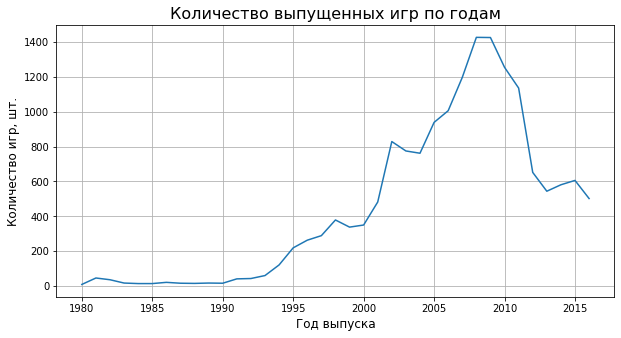

In [27]:
plt.figure(figsize=(10, 5));

data.query('year_of_release != -1').groupby('year_of_release')['name'].count().plot();

plt.title("Количество выпущенных игр по годам", fontsize=16);
plt.xlabel("Год выпуска", fontsize=12);
plt.ylabel("Количество игр, шт.", fontsize=12);
plt.grid();

Как можно видеть, до 1990 года количество выпускаемых игр практически не изменялось и не превышало десятков штук в год. Активный рост количества выпускаемых игр (с незначительными падениями в конце 1990-х гг. и между 2002-2004 гг.) начался с 1990-х годов и продолжался до 2008-2009 гг., достигнув примерно 1400 шт. в год. Такая тенденция бурного роста вероятнее всего вызвана значительным техническим прогрессом в качестве выпускаемых игр и игровых платформ.что вызвано активным бумом в игровой индустрии. Однако, достигнув пиковых значений в 2008-2009 гг. происходит резкое снижение количества выпускаемых игр более чем в половину: с 1400 шт. в 2009 г. до примерно 600 шт. в 2013 г., что, с одной стороны, возможно, вызвано глобальным экономическим кризисом 2008 года. А сдругой стороны, может объясняться начавшимся в те годы бурным развитием мобильных платформ и игровых приложений. Всё это и привело к спаду спроса на игровую продукцию и, соответственно, снижением количества выпускаемых игр. Тем не менее с 2013 по 2016 гг. количество выпускаемых игр остаётся на уровне начала 2000-ч гг. и находится в пределах 500-600 шт в год.

Поскольку нам важны только актуальные данные, то возьмём временной промежуток с 1990 года, когда начался активный бум технологического развития в игровой индустрии:

In [28]:
data = data.query('year_of_release >= 1990')

Теперь посмотрим, как менялись продажи по платформам с 1990 года: 

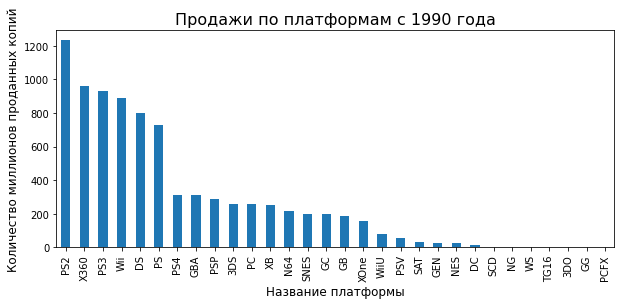

In [29]:
plt.figure(figsize=(10,4));

data.groupby('platform')['total_sales']\
.sum().sort_values(ascending=False).plot(
    kind='bar',
    x='platform',
    y='total_sales'
);

plt.title("Продажи по платформам с 1990 года", fontsize=16);
plt.xlabel("Название платформы", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);

Видно, что за период с 1990 по 2016 гг. платформами с наибольшими суммарными продажами являются: PS2, X360, PS3, Wii, DS и PS. Построим для них распределение по годам.

Сначала создадим датафрейм top_platform_sales, куда передадим данные о суммарных продажах для этих платформ:

In [30]:
top_platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(6)

top_platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.76
5,PS,727.58


Переведём названия этих платформ в список top_platforms:

In [31]:
top_platforms = top_platform_sales['platform'].to_list()

top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Построим распределения:

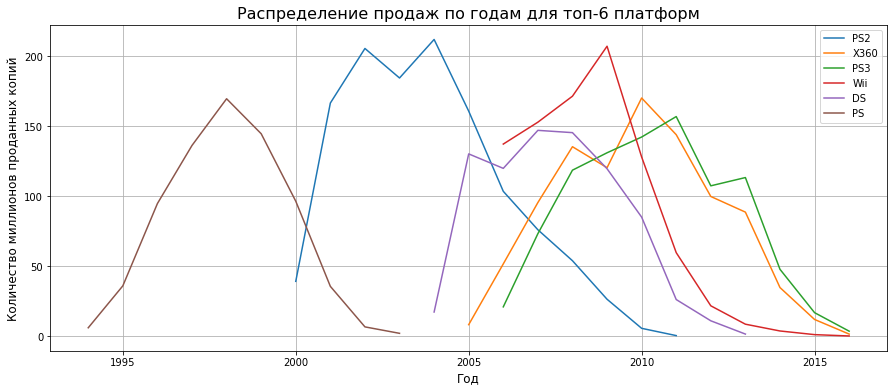

In [32]:
plt.figure(figsize=(15,6));
plt.title("Распределение продаж по годам для топ-6 платформ", fontsize=16);
plt.xlabel("Год", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.grid();


for i in range(len(top_platforms)):
    plt.plot(data.query('platform == @top_platforms[@i]').pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    ), label=top_platforms[i]);
    plt.legend();

Видно, что в среднем игровые платформы существуют около 10 лет, причём пик продаж игр для них достигается через примерно 3-5 лет после появления.

Определим, за какой характерный срок появляются новые платформы и исчезают старые. Для этого посчитаем, сколько лет проходит после появления нового поколения платформы и уходом из рейтинга продаж старого поколения.

С одной стороны, можно оценивать характерный срок смены платформ внутри одной компании-производителя. Так, на приведённом выше графике видно, что после выхода PS2 прошло 4 года (с 2000 по 2003) до вытеснения с рынка платформы PS, а с появлением PS3 в 2006 году PS2 был полностью замещён к 2011 году, т.е. через 6 лет. То есть в среднем характерный срок появления новых платформ и исчезновения старых составляет 5 лет. 

А если оценивать характерный срок смены платформ безотносительно к компании-производителю, то можно увидеть, например, что появление в 2004-2006 гг. новых платформ (X360, PS3, Wii, DS) привело к исчезновению игр на PS2 только в 2011 году, т.е. через 6-8 лет. Однако такая оценка характерного срока не может считаться корректной, т.к. логично предположить, что пользователи одной платформы с большей вероятностью перейдут на новое поколение той же платформы, а не полностью сменят компанию-производителя платформы.

Таким образом, характерный срок появления новых платформ и исчезновения старых составляет в среднем 5 лет.

Чтобы построить прогноз на 2017 год, возьмём данные за актуальный период, т.е. за период не более 5 последних лет, а именно, с 2012 года. Для этого создадим датафрейм data_rel, куда передадим данные с 2012 года:

In [33]:
data_rel = data.query('year_of_release >= 2012')

data_rel

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60
34,34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16434,16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16438,16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16441,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16443,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01


Теперь определим, какие платформы лидируют по продажам, растут или падают за период с 2012 года.

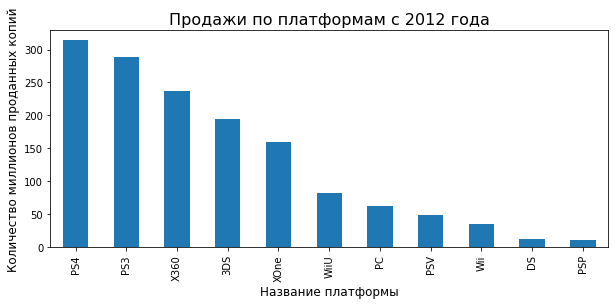

In [34]:
plt.figure(figsize=(10,4));

data_rel.groupby('platform')['total_sales']\
.sum().sort_values(ascending=False).plot(
    kind='bar',
    x='platform',
    y='total_sales'
);

plt.title("Продажи по платформам с 2012 года", fontsize=16);
plt.xlabel("Название платформы", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);

За рассматриваемый период лидерами продаж (топ-5) являются платформы PS4, PS3, X360, 3DS и XOne: количество проданных копий игр на них превышает 150 миллионов для каждой платформы.

In [35]:
platform_sales = data_rel.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

platform_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.78
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [36]:
platforms = platform_sales['platform'].to_list()

platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

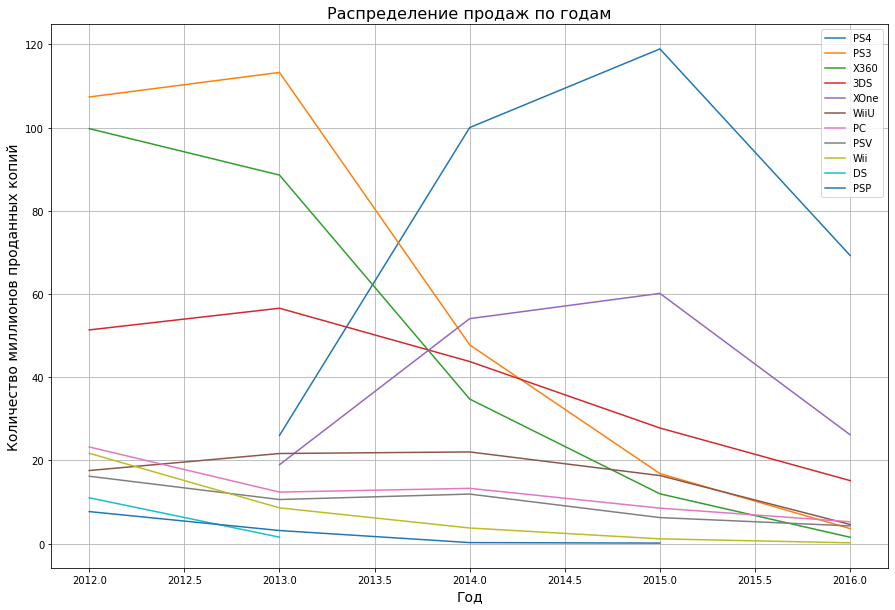

In [37]:
plt.figure(figsize=(15,10));
plt.title("Распределение продаж по годам", fontsize=16);
plt.xlabel("Год", fontsize=14);
plt.ylabel("Количество миллионов проданных копий", fontsize=14);
plt.grid();


for i in range(len(platforms)):
    plt.plot(data_rel.query('platform == @platforms[@i]').pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    ), label=platforms[i]);
    plt.legend();


Рост отмечается только для платформ PS4 и XOne, что обусловлено их относительно недавним появлениям в рамках рассматриваемого временного промежутка - 2013 г. Игры для остальных платформ имеют тенденцию к снижению суммарных продаж. 

В связи с этим потенциально прибыльными платформами можно считать PS4 и XOne.

Построим диаграмму размаха («ящик с усами») по глобальным продажам игр в разбивке по платформам:

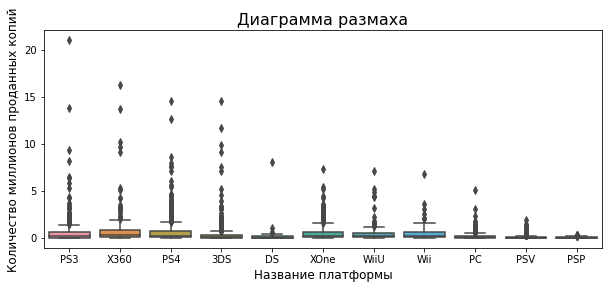

In [38]:
plt.figure(figsize=(10,4));

sns.boxplot(data=data_rel, x='platform', y='total_sales');

plt.title("Диаграмма размаха", fontsize=16);
plt.xlabel("Название платформы", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);

Видно, что в данных большое количество выбросов, и чтобы оценить, как различаются медианные значения и межквартильный размах, необходимо ограничить данные по оси y значением 3, например:

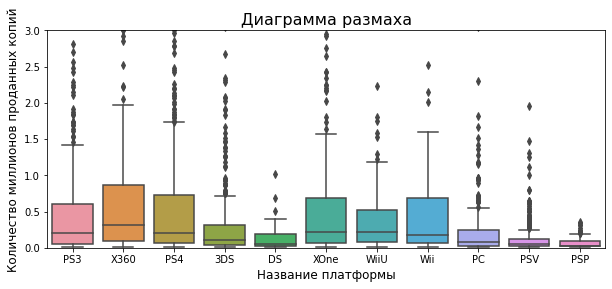

In [39]:
plt.figure(figsize=(10,4));

sns.boxplot(data=data_rel, x='platform', y='total_sales');

plt.title("Диаграмма размаха", fontsize=16);
plt.xlabel("Название платформы", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.ylim(0,3);

Как можем видеть, размер "ящиков с усами" для всех платформ сильно варьируется, причём для PS3, X360, PS4 и XOne межквартильный размах наибольший, а вот для платформы 3DS значения объёмов продаж более близкие, и, несмотря на выбросы, размер "ящика" довольно мал. Медианы также сильно различаются, но не превышают 0.5 миллионов проданных копий.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для рассмотрения возьмём платформу PS4. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

In [40]:
sony_ps4 = data_rel.query('platform == "PS4" and user_score != -1 and critic_score != -1')

sony_ps4

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16218,16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16231,16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16232,16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Unknown,0.01
16257,16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


Сначала посмотрим, как зависит объём продаж от оценок пользователей:

<Figure size 720x288 with 0 Axes>

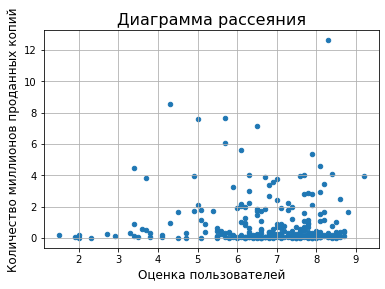

In [41]:
plt.figure(figsize=(10,4));

sony_ps4.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
);

plt.title("Диаграмма рассеяния", fontsize=16);
plt.xlabel("Оценка пользователей", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.grid();

In [42]:
sony_ps4['user_score'].corr(sony_ps4['total_sales'])

-0.03362497596528878

Как можно видеть, между оценками пользователей и объёмом продаж не наблюдается линейной зависимости: коэффициент корреляции находится около 0.

Теперь изучим, как зависит объём продаж от оценок критиков:

<Figure size 720x288 with 0 Axes>

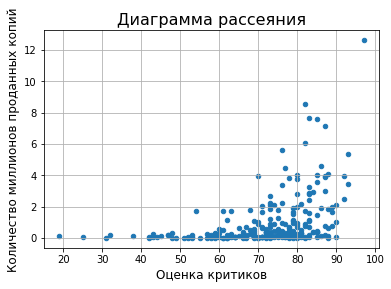

In [43]:
plt.figure(figsize=(10,4));

sony_ps4.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
);

plt.title("Диаграмма рассеяния", fontsize=16);
plt.xlabel("Оценка критиков", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.grid();

In [44]:
sony_ps4['critic_score'].corr(sony_ps4['total_sales'])

0.40589480145836687

В данном случае уже видна средняя корреляция между оценками критиков и объёмом продаж: коэффициент корреляции составляет 0.4.

Таким образом, можно сказать, что на объём продаж игр на платформе в гораздо большей степени влияют оценки критиков, нежели оценки пользователей, т.е. чем больше положительных отзывов от критиков, тем больше будет продаж, что наглядно демонстрируется при оценках выше 60. Вероятно, это обусловлено авторитетностью критиков и, соответственно, доверию к их мнению со стороны игроков при выборе той или иной игры.

Соотнесём выводы с продажами игр на других платформах. Построим диаграммы рассеяния и рассчитаем корреляцию для всех 11 платформ, для которых продавались игры с 2012 года:

<Figure size 720x288 with 0 Axes>

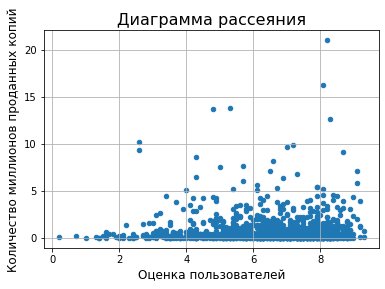

In [45]:
plt.figure(figsize=(10,4));

data_rel.query('user_score != -1').plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
);

plt.title("Диаграмма рассеяния", fontsize=16);
plt.xlabel("Оценка пользователей", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.grid();

In [46]:
data_rel.query('user_score != -1')['user_score'].corr(data_rel['total_sales'])

0.0041944811069172284

<Figure size 720x288 with 0 Axes>

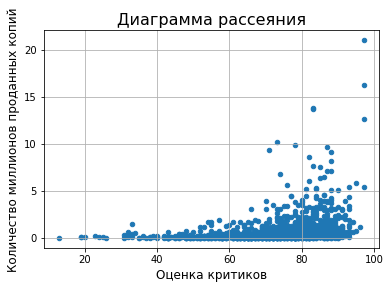

In [47]:
plt.figure(figsize=(10,4));

data_rel.query('critic_score != -1').plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
);

plt.title("Диаграмма рассеяния", fontsize=16);
plt.xlabel("Оценка критиков", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.grid();

In [48]:
data_rel.query('critic_score != -1')['critic_score'].corr(data_rel['total_sales'])

0.30863336128976016

Таким образом, выводы по платформе PS4 в целом описывают общую картину по другим платформам, т.е.  на объём продаж игр на платформе в гораздо большей степени влияют оценки критиков, нежели оценки пользователей, причём коэффициенты корреляции отличаются в пользу оценок критиков приблизительно в 80 раз: 0.31 проти 0.004.

Посмотрим на общее распределение игр по жанрам, построив гистограмму по всем жанрам:

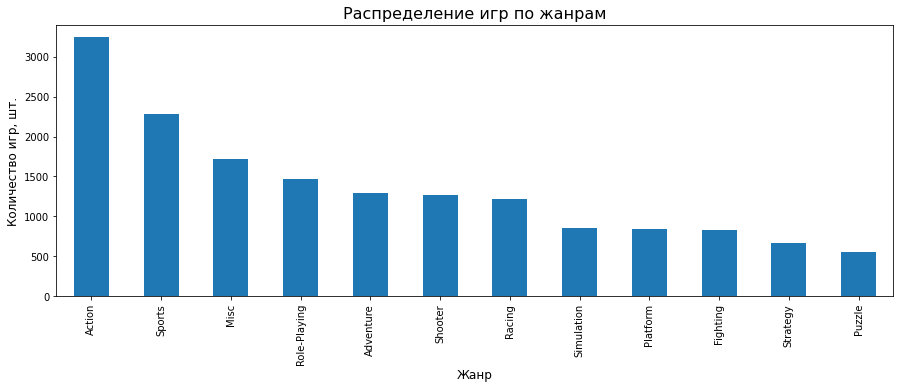

In [49]:
plt.figure(figsize=(15, 5))

data['genre'].value_counts().plot(kind='bar')

plt.title('Распределение игр по жанрам', fontsize=16)
plt.xlabel("Жанр", fontsize=12)
plt.ylabel("Количество игр, шт.", fontsize=12)
plt.show()

Видно, что чаще всего встречаются игры в жанрах Action и Sports, т.е. те, где требуется быстрая реакция, а реже всего - жанры Puzzle и Strategy, где необходимы терпение и сосредоточенность. 

Посмотрим теперь, как зависит прибыль от типа игрового жанра:

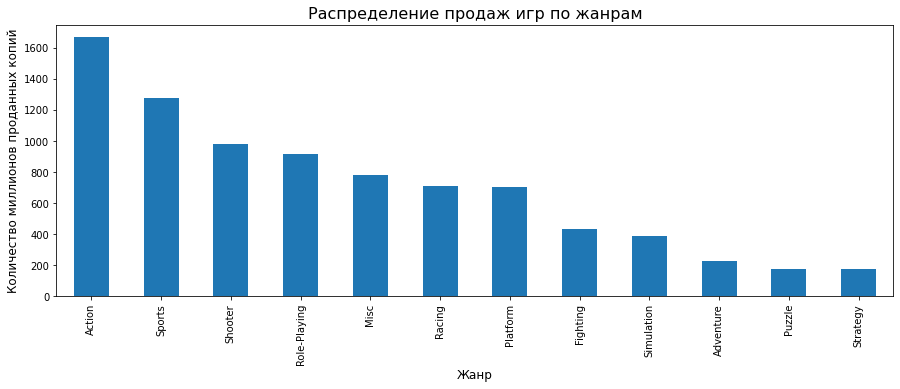

In [50]:
plt.figure(figsize=(15, 5))

data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

plt.title('Распределение продаж игр по жанрам', fontsize=16)
plt.xlabel("Жанр", fontsize=12)
plt.ylabel("Количество миллионов проданных копий", fontsize=12)
plt.show()

Можно видеть, что наиболее продаваемыми являются самые распространённые жанры, т.е. Action и Sports, а низкие продажи характерны для наиболее редких жанров Puzzle и Strategy.

Однако чтобы отыскать наиболее прибыльные жанры, следует рассмотреть средние или медианные значения продаж. Для этого построим диаграмму размаха для всех жанров за актуальный период:

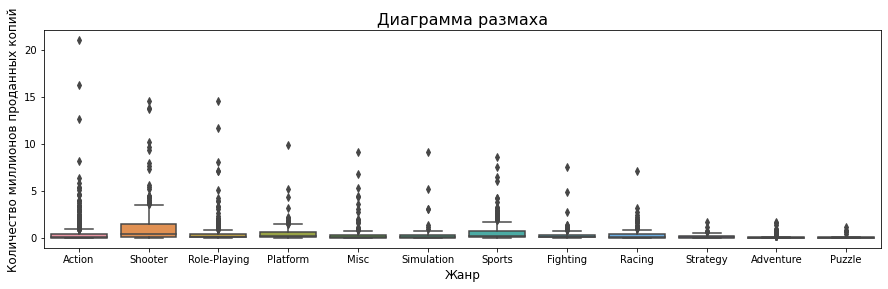

In [51]:
plt.figure(figsize=(15,4));

sns.boxplot(data=data_rel, x='genre', y='total_sales');

plt.title("Диаграмма размаха", fontsize=16);
plt.xlabel("Жанр", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);

Слишком много выбросов и не видны медианы, ограничим значения по оси y. Дополнительно вычислим медианы суммарных продаж по жанрам, чтобы наглядно иметь числовые значения.

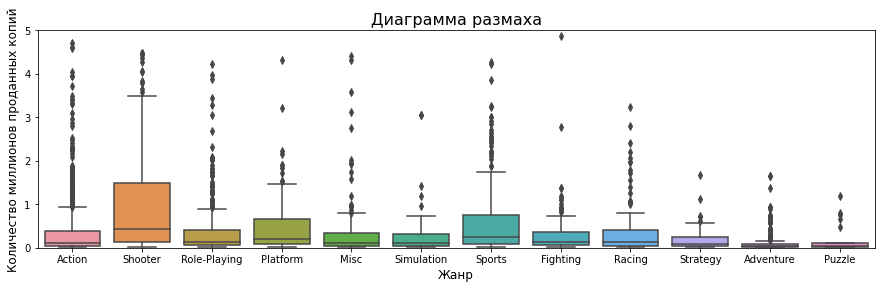

In [52]:
plt.figure(figsize=(15,4));

sns.boxplot(data=data_rel, x='genre', y='total_sales');

plt.title("Диаграмма размаха", fontsize=16);
plt.xlabel("Жанр", fontsize=12);
plt.ylabel("Количество миллионов проданных копий", fontsize=12);
plt.ylim(0, 5);

In [53]:
data_rel.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

Как можно видеть, несмотря на популярность игр в жанре Action, медианы продаж таких игр находятся на среднем уровне, а лидерство в рейтинге суммарных продаж обеспечивается большим количеством выбросов, т.е. некоторым количеством игр с очень большим количеством миллионов проданных копий. В то же время игры в жанрах Shooter, Sports и Platform медианно приносят наибольшие прибыли.

 *Таким образом, был проведён исследовательский анализ данных, в результате которого было определено следующее:*
 - продажи игр осуществлялись с 1980 по 2016 гг., причём целесообразно рассматривать период с 1990 года, когда продажи начали рост;
 - за период с 1990 по 2016 гг. платформами с наибольшими суммарными продажами являются: PS2, X360, PS3, Wii, DS и PS;
 - в среднем игровые платформы существуют около 10 лет, причём пик продаж игр для них достигается через примерно 3-5 лет после появления;
 - характерный срок появления новых платформ и исчезновения старых составляет в среднем 5 лет, поэтому в качестве актуального периода возьмём полные данные за последние 5 лет, т.е. с 2011 года;
 - за рассматриваемый период лидерами продаж (топ-5) являются платформы PS3, X360, PS4, 3DS и XOne, при этом рост отмечается только для платформ PS4 и XOne, поэтому их можно считать потенциально прибыльными;
 - построение графиков «ящик с усами» по глобальным продажам игр в разбивке по этим потенциально прибыльным платформам показало, что размер ящиков несколько отличается, при этом медиана находится приблизительно на одинаковом уровне - около 0.25 миллионов проданных копий, а выбросы для PS4 начинаются на более высоком уровне - 1.75, против 1.5;
 - оценка влияния на продажи внутри одной популярной платформы (PS4) отзывов пользователей и критиков показала, что на объём продаж игр на платформе в гораздо большей степени влияют оценки критиков, нежели оценки пользователей, причём такой вывод справделив и для всех 12 платформ, продажи для которых имеются с 2011 года;
 - рассмотрение общего распределения игр по жанрам показало, что по частоте встречаемости и суммарным продажам лидируют жанры Action и Sports, в то время как по медианным значениям наиболее прибыльными являются жанры Shooter, Sports и Platform.

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

Начнём с региона Северной Америки (NA):

In [54]:
data_rel.groupby('platform')['na_sales'].sum().reset_index()\
.sort_values(by='na_sales', ascending=False).head(5)

,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [55]:
data_rel.groupby('genre')['na_sales'].sum().reset_index()\
.sort_values(by='na_sales', ascending=False).head(5)

,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [56]:
data_rel.query('rating != -1').groupby('rating')['na_sales'].sum().reset_index()\
.sort_values(by='na_sales', ascending=False).head(5)

,rating,na_sales
2,M,231.57
0,E,114.37
4,Unknown,103.31
1,E10+,75.70
3,T,66.02


Так, портрет пользователя из Северной Америки выглядит следующим образом:
- X360 лидирует с большим отрывом - более 140 миллионов проданных копий игр, далее следуют PS4 и PS3 с примерно 100 миллионами проданных копий;
- наиболее популярны игры в жанрах Action и Shooter - в области 140-170 миллионов копий, на третьем месте располагаются игры в жанре Sports - около 80 миллионов копий;
- с большим отрывом по продажам лидирует рейтинг M (Mature) - более 230 миллионов проданных копий игр, на втором месте с примерно в 2 раза меньшим количеством игр располагается рейтинг E (Everyone), а на третьем месте рейтинг игр неизвестен ('Unknown'), что, вероятно, объясняется тем, что часть игр не получила рейтинг ESRB или данные были утеряны.

Далее рассмотрим регион Европейского Союза (EU):

In [57]:
data_rel.groupby('platform')['eu_sales'].sum().reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)

,platform,eu_sales
4,PS4,141.09
3,PS3,106.85
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [58]:
data_rel.groupby('genre')['eu_sales'].sum().reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)

,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.08
7,Role-Playing,48.53
6,Racing,27.29


In [59]:
data_rel.query('rating != -1').groupby('rating')['eu_sales'].sum().reset_index()\
.sort_values(by='eu_sales', ascending=False).head(5)

,rating,eu_sales
2,M,193.96
0,E,113.02
4,Unknown,91.50
1,E10+,55.37
3,T,52.96


Портрет европейского пользователя таков:
- PS4 и PS3 лидируют с более 100 миллионами проданных копий игр каждая, X360 занимает третье место;
- первые три места также занимают игры в жанрах Action, Shooter и Sports; 
- также с большим отрывом в лидерах находятся игры для лиц старше 17 лет (M), далее идут игры для всех (E), на третьем месте также игры с неопределённым рейтингом.

Теперь составим портрет пользователя из Японии:

In [60]:
data_rel.groupby('platform')['jp_sales'].sum().reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)

,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


In [61]:
data_rel.groupby('genre')['jp_sales'].sum().reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)

,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


In [62]:
data_rel.query('rating != -1').groupby('rating')['jp_sales'].sum().reset_index()\
.sort_values(by='jp_sales', ascending=False).head(5)

,rating,jp_sales
4,Unknown,108.84
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


Можно сказать, что японский пользователь:
- чаще всего пользуется платформой 3DS от компании Nintendo - около 90 миллионов проданных копий игр, остальные позиции занимают платформы компании Sony (PS3, PSV, PS4) и WiiU;
- игры в жанрах Role-Playing и Action лидируют с большим отрывом - по 50-65 миллионов копий;
- наиболее популярны игры неопределённого рейтинга - более 100 миллионов копий, далее идут игры для всех (E) и для подростков (лиц старше 13 лет, T).

И наконец, можно проанализовать пользователя из других стран:

In [63]:
data_rel.groupby('platform')['other_sales'].sum().reset_index()\
.sort_values(by='other_sales', ascending=False).head(5)

,platform,other_sales
4,PS4,48.35
3,PS3,43.26
9,X360,20.40
10,XOne,14.27
0,3DS,8.87


In [64]:
data_rel.groupby('genre')['other_sales'].sum().reset_index()\
.sort_values(by='other_sales', ascending=False).head(5)

,genre,other_sales
0,Action,51.14
8,Shooter,37.26
10,Sports,22.44
7,Role-Playing,14.83
3,Misc,7.67


In [65]:
data_rel.query('rating != -1').groupby('rating')['other_sales'].sum().reset_index()\
.sort_values(by='other_sales', ascending=False).head(5)

,rating,other_sales
2,M,63.38
0,E,31.44
4,Unknown,27.17
3,T,17.94
1,E10+,16.23


Пользователи из других стран:
- чаще выбирают платформы компании Sony - PS4 и PS3, реже - платформы компании Microsoft - X360 и XOne;
- первые три места занимают игры в жанрах Action, Shooter и Sports;
- наиболее популярны игры с ретингами M, E и Unknown.

Таким образом, можно сказать, что:
- у пользователей Северной Америки наиболее популярны платформы компании Microsoft (X360, XOne), в несколько меньшей степени - платформы компании Sony (PS4, PS3). В то же время у японских пользователей лидируют платформы местных производителей: 3DS и WiiU (от Nintendo) и платформы компании Sony(PS3, PSV, PS4). При этом в Европе и в остальном мире лидируют платформы PS4 и PS3, что, вероятно, обусловлено их более высоким качеством;
- во всех регионах, кроме Японии, наиболее популярны игры в жанрах Action, Shooter и Sports, т.е. игры, требующие быстрой реакции и мгновенного принятия решений. В Японии напротив лидируют ролевые игры, а игры в жанре Action находятся на втором месте, что вероятно, обусловлено большим интересом в этой стране к традиционным настольным играм, на основе которых создаются игры в жанре Role-playing;
- аналогичным образом во всех регионах, кроме Японии, большей популярностью пользуются игры для лиц старше 17 лет (M) и игры для всех (E), а на третьем месте расположены игры с неопределённым рейтингом ('Unknown'). В то же время в Японии лидируют игры без рейтинга, а далее следуют игры для всех (E) и игры для подростков (T). То есть можно сказать, что рейтинг ESRB применяется главным образом для игр, не реализуемых в Японии.

## Проверим гипотезы

Теперь перейдём к проверке поставленных в самом начале гипотез.

Первая гипотеза звучала так: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Чтобы подтвердить или опровергнуть гипотезу, необходимо провести статистический анализ, использовав t-тест.

В качестве нулевой гипотезы примем следующее: средние пользовательские рейтинги платформ XBox One и PC равны. 

Альтернативная гипотеза: средние пользовательские рейтинги платформ XBox One и PC не равны. 

То есть гипотеза двусторонняя.

Если у нас не будет оснований отвергнуть нулевую гипотезу, значит, будем считать рейтинги одинаковыми.

Уровень статистической значимости зададим равным 5 %.

Теперь проведём проверку:

In [66]:
alpha = 0.05 # уровень статистической значимости

xone = data_rel.query('platform == "XOne" and user_score != -1')

pc = data_rel.query('platform == "PC" and user_score != -1')

results = st.ttest_ind(xone['user_score'], pc['user_score'])

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', xone['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг платформы PC -', pc['user_score'].mean().round(2))

p-value: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.52
Cредний пользовательский рейтинг платформы PC - 6.43


Таким образом, можно считать, что средние пользовательские рейтинги платформ XBox One и PC равны.

Проверим следующую гипотезу: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

Гипотеза снова двусторонняя.

Если мы отвергнем нулевую гипотезу, значит, будем считать рейтинги разными.

Уровень статистической значимости зададим равным 5 %.

Теперь проведём проверку:

In [67]:
alpha = 0.05 # уровень статистической значимости

action = data_rel.query('genre == "Action" and user_score != -1')

sports = data_rel.query('genre == "Sports" and user_score != -1')

results = st.ttest_ind(action['user_score'], sports['user_score'])

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
    
print()    
print('Cредний пользовательский рейтинг жанра Action -', action['user_score'].mean().round(2))
print('Cредний пользовательский рейтинг жанра Sports -', sports['user_score'].mean().round(2))

p-value: 4.8045233804629176e-26
Отвергаем нулевую гипотезу

Cредний пользовательский рейтинг жанра Action - 6.83
Cредний пользовательский рейтинг жанра Sports - 5.46


Таким образом, можно считать, что средние пользовательские рейтинги жанров Action и Sports разные.


Вывод: проверка статистическими методами на основе наших данных и при заданном уровне значимости показала, что у нас есть достаточно оснований принять обе гипотезы.

## Напишем общий вывод

Были изучена информация о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

Перед нами данные до 2016 года. 

Задача - выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


1. Общая информация о данных:
Исходные данные состоят из 16715 строк и 11 столбцов, причём:
- имеются пропущенные значения;
- названия столбцов не соответсвуют правилам синтаксиса в Python;
- тип данных в ряде столбцов не соответствует содержимому.

2. Предобработка данных:
- названия столбцов были приведены в соответствие с правилами синтаксиса;
- пропущенные значения были в большинстве случаев заменены на -1, чтобы можно было изменить типы данных там, где это необходимо, и чтобы при дальнейшем анализе учитывать максимально возможный объём данных, убирая из расчётов отрицательные значения (т.е. пропуски), при этом в столбце 'rating' пропуски были заменены на 'Unknown';
- были удалены только 2 строки, которые содержали пропущенные значения в столбцах 'name', 'genre', 'critic_score', 'user_score' и 'rating';
- явные дубликаты отсутсвуют;
- неявных дубликатов было 2, они были устранены;
- был создан столбец 'total_sales' со значениями суммарных продаж во всех регионах.

3. Исследовательский анализ данных:
- за период с 1990 (тогда начался рост количества выпускаемых игр) по 2016 гг. платформами с наибольшими суммарными продажами являются: PS2, X360, PS3, Wii, DS и PS;
- характерный срок появления новых платформ и исчезновения старых составляет в среднем 5 лет, поэтому актуальный период - с 2012 года, т.е. за последние 5 лет;
- за актуальный период лидерами продаж (топ-5) являются платформы PS4, PS3, X360, 3DS и XOne, при этом рост отмечается только для платформ PS4 и XOne, поэтому их можно считать потенциально прибыльными;
- размер "ящиков с усами" для всех платформ сильно варьируется, причём для PS3, X360, PS4 и XOne межквартильный размах наибольший, а вот для платформы 3DS значения объёмов продаж более близкие, и, несмотря на выбросы, размер "ящика" довольно мал. Медианы также сильно различаются, но не превышают 0.5 миллионов проданных копий.
- оценка влияния на продажи внутри одной популярной платформы (PS4) отзывов пользователей и критиков показала, что на объём продаж игр на платформе в гораздо большей степени влияют оценки критиков, нежели оценки пользователей, причём такой вывод справделив и для всех 11 платформ, продажи для которых имеются с 2012 года;
- рассмотрение общего распределения игр по жанрам показало, что наиболее продаваемыми являются самые распространённые жанры, т.е. Action и Sports, а низкие продажи характерны для наиболее редких жанров Puzzle и Strategy. В то же время игры в жанрах Shooter, Sports и Platform медианно приносят наибольшие прибыли.

4. Портрет пользователя каждого региона:
- у пользователей Северной Америки наиболее популярны платформы компании Microsoft (X360, XOne),  у японских пользователей - платформы местных производителей: Nintendo (3DS и WiiU) и платформы компании Sony(PS3, PSV, PS4), а в Европе и в остальном мире лидируют платформы PS4 и PS3;
- во всех регионах, кроме Японии, наиболее популярны игры в жанрах Action, Shooter и Sports. В Японии напротив лидируют ролевые игры, но и игры в жанре Action также находятся в топе;
- аналогичным образом во всех регионах, кроме Японии, большей популярностью пользуются игры для лиц старше 17 лет (M) и игры для всех (E), в то время как в Японии лидируют игры без рейтинга ('Unknown'), а далее следуют игры для всех (E) и игры для подростков (T).

5. Проверка гипотез
В результате проверки статистическими методами было показано, что:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Таким образом, можно выявить следующие закономерности, определяющие успешность игры:
- набирают объёмы продаж игр на платформы PS4 и XOne, которые также входят в лидеры по количеству миллионов проданных копий игр с 2012 года;
- положительные отзывы критиков (с оценкой более 60) играют важную роль в объёмах продаж игр;
- наиболее популярны игры в жанрах Action и Sports, однако стабильно наибольшую прибыль медианно приносят игры в жанрах Shooter, Sports и Platform;
- во всех регионах высокой популярностью пользуются игры для всех (E).